In [ ]:
# Step: Imports and package setup
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import json
import re
import pickle
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint ,CSVLogger
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import backend as K
from math import ceil
%matplotlib inline

In [ ]:
# Step: Miscellaneous processing step
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step: Define model architecture (Keras / TensorFlow)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices)

In [ ]:
# Step: Function and class definitions (helper utilities)
def load_data_1(image_path,mask_path,image_size=(256,256)):
    all_image=[]
    all_mask=[]
#     dataset_path='/kaggle/input/brain-tumor-segmentation'

    images_name=os.listdir(image_path)


    for image_name in images_name :

        image=cv.imread(os.path.join(image_path,image_name),cv.IMREAD_GRAYSCALE)
        mask=cv.imread(os.path.join(mask_path,image_name),cv.IMREAD_GRAYSCALE)
        if image is not None and mask is not None:
            image=cv.resize(image,image_size)/255.0
            mask=cv.resize(mask,image_size)/255.0
            all_image.append(image)
            all_mask.append(mask)
    return np.array(all_image,dtype=np.float32),np.array(all_mask,dtype=np.float32)
with tf.device('/device:GPU:0'):
    image_path='/content/drive/MyDrive/YES'
    mask_path='/content/drive/MyDrive/MASK/'
    x_1,y_1=load_data_1(image_path,mask_path)


In [ ]:
# Step: Miscellaneous processing step
print(type(x_1),type(y_1))
print(len(x_1),len(y_1))

In [ ]:
# Step: Imports and package setup
import cv2
with tf.device('/device:GPU:0'):
  def load_2d_mri(dataset='MyDrive',images='/content/drive/MyDrive/YES/',masks='/content/drive/MyDrive/MASK/'):


      start_list=['1.png','709.png','922.png','1283.png','1841.png','2344.png']
      stop_list=['210.png','746.png','1033.png','1455.png','2241.png','2402.png']
      length_manage_list=len(stop_list)-1

      all_image_name=os.listdir(images)
      flag=False
      g=0
      lst=[]
      for name in range(1,len(all_image_name)+1) :

          name=f"{name}.png"
          if name==start_list[g]:
              flag=True
  #             print(name)
          if flag==True :
              lst.append(name)

          if name==stop_list[g]:
              flag=False
              if length_manage_list!= g :
                  g+=1
  #             print(name)
  #             print(g)
      return lst
  all_img_name=load_2d_mri()
  print(len(all_img_name))
  #--------------------------------------------------

  def load_data_2(image_size=(256, 256), to_array=True, image_path='/content/drive/MyDrive/YES', mask_path='/content/drive/MyDrive/MASK'):
      images_name = os.listdir(image_path)
      all_image = []
      all_mask = []
      for image_name in images_name :
          image = cv2.imread(os.path.join(image_path, image_name), 0)
          if image is None:
              print(f"Can't open/read image: {image_name}")
              continue
          image = cv2.resize(image, image_size)
          image = image / 255.0
          image = image.astype(np.float32)
          all_image.append(image)

          mask = cv2.imread(os.path.join(mask_path, image_name.replace('.png', '.jpg')), 0)
          if mask is None:
              print(f"Can't open/read mask for image: {image_name}")
              continue
          mask = cv2.resize(mask, image_size)
          mask = mask / 255.0
          mask = mask.astype(np.float32)
          all_mask.append(mask)

      if to_array:
          all_image = np.array(all_image)
          all_mask = np.array(all_mask)
      return all_image, all_mask

  images = '/content/drive/MyDrive/YES'
  masks = '/content/drive/MyDrive/MASK'

  x_2, y_2 = load_data_2(to_array=False, image_path=images, mask_path=masks)



993


In [ ]:
# Step: Miscellaneous processing step
print(type(x_2),type(y_2))
print(len(x_2),len(y_2))

<class 'list'> <class 'list'>
4147 4147


In [ ]:
# Step: Function and class definitions (helper utilities)
with tf.device('/device:GPU:0'):
  def merge_data():
      x_final=[]
      y_final=[]
      x_final.extend(x_1)
      x_final.extend(x_2)
      y_final.extend(y_1)
      y_final.extend(y_2)
      x_final=np.array(x_final)
      y_final=np.array(y_final)
      print(x_final.shape,y_final.shape)
      return x_final,y_final
  x_final,y_final=merge_data()


In [ ]:
# Step: Function and class definitions (helper utilities)
with tf.device('/device:GPU:0'):
  def split_data(test_size=0.15,log=True,shuffle=True):
      x_train, x_test_val, y_train, y_test_val = train_test_split(x_final, y_final, test_size=test_size,shuffle=shuffle)
      if log==True :
          print('Input: ')
          print(x_final.shape,(y_final).shape)
          print('----------------------------')

      x_test=x_test_val[:int(len(x_test_val)*0.5)]
      x_val=x_test_val[int(len(x_test_val)*0.5):]
      y_test=y_test_val[:int(len(y_test_val)*0.5)]
      y_val=y_test_val[int(len(y_test_val)*0.5):]


      x_train=x_train.reshape(-1,256,256,1)
      y_train=y_train.reshape(-1,256,256,1)
      x_test=x_test.reshape(-1,256,256,1)
      y_test=y_test.reshape(-1,256,256,1)
      x_val=x_val.reshape(-1,256,256,1)
      y_val=y_val.reshape(-1,256,256,1)
      if log==True :
          print('Output: ')
          print(x_train.shape,y_train.shape)
          print(x_test.shape,(y_test).shape)
          print(x_val.shape,y_val.shape)
          print('----------------------------')
      return x_train,y_train,x_test,y_test,x_val,y_val
  x_train,y_train,x_test,y_test,x_val,y_val=split_data()
  validation_dataset=(x_val,y_val)

In [ ]:
# Step: Function and class definitions (helper utilities)
from tensorflow.keras.layers import SpatialDropout2D

with tf.device('/device:GPU:0'):
  def double_conv_block(inputs, num_filters, dropout_rate=0.1):
      x = Conv2D(num_filters, 3, padding="same")(inputs)
      x = BatchNormalization()(x)
      x = Activation("relu")(x)

      x = Conv2D(num_filters, 3, padding="same")(x)
      x = BatchNormalization()(x)
      x = Activation("relu")(x)


      x = SpatialDropout2D(dropout_rate)(x)

      return x
  def Build_Unet_Model(num_filters=64,input_shape=(256,256,1)):
      inputs = Input(input_shape)
      f_1 = double_conv_block(inputs, num_filters*1)
      p_1 = MaxPool2D((2, 2))(f_1)
      f_2 = double_conv_block(p_1, num_filters*2)
      p_2 = MaxPool2D((2, 2))(f_2)
      f_3 = double_conv_block(p_2, num_filters*4)
      p_3 = MaxPool2D((2, 2))(f_3)
      f_4 = double_conv_block(p_3, num_filters*8)
      p_4 = MaxPool2D((2, 2))(f_4)

      c=double_conv_block(p_4,num_filters*16)

      d_1 = Conv2DTranspose(num_filters*8, 2, strides=2, padding="same")(c)
      d_1= Concatenate()([d_1, f_4])
      d_1 = double_conv_block(d_1, num_filters*8)

      d_2 = Conv2DTranspose(num_filters*4, 2, strides=2, padding="same")(d_1)
      d_2= Concatenate()([d_2, f_3])
      d_2 = double_conv_block(d_2, num_filters*4)

      d_3 = Conv2DTranspose(num_filters*2, 2, strides=2, padding="same")(d_2)
      d_3= Concatenate()([d_3, f_2])
      d_3 = double_conv_block(d_3, num_filters*2)

      d_4 = Conv2DTranspose(num_filters*1, 2, strides=2, padding="same")(d_3)
      d_4= Concatenate()([d_4, f_1])
      d_4 = double_conv_block(d_4, num_filters*1)

      outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d_4)
      Unet_Model = Model(inputs, outputs, name="UNetModel")
      return Unet_Model

In [ ]:
# Step: Miscellaneous processing step
Unet_Model = Build_Unet_Model()
#Unet_Model.summary()

In [ ]:
# Step: Imports and package setup
from tensorflow.keras.losses import binary_crossentropy
import tensorflow.keras.backend as K
with tf.device('/device:GPU:0'):

  def Dice_Coefficient(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    dice = K.mean((2.0 * intersection + smooth) / (union + smooth), axis=0)
    return dice

  def Dice_Loss(y_true, y_pred):
      return 1.0 - Dice_Coefficient(y_true, y_pred)

  def combined_loss(y_true, y_pred, weight=0.5):
      dice_loss_val = Dice_Loss(y_true, y_pred)
      bce = binary_crossentropy(y_true, y_pred)
      return weight * dice_loss_val + (1 - weight) * bce

In [ ]:
# Step: Miscellaneous processing step
Unet_Model.compile(
    loss=combined_loss,  # Utiliser la fonction de perte combinée
    optimizer='adam',
    metrics=[Dice_Coefficient, "binary_accuracy"]
)

In [ ]:
# Step: Function and class definitions (helper utilities)
def make_callbacks(csv_path='my_new_log_3.csv'):
    from tensorflow.keras.callbacks import EarlyStopping, CSVLogger
    early_stop = EarlyStopping(monitor='val_loss', patience=15, mode='min', restore_best_weights=True)
    csv_logger = CSVLogger(csv_path)
    callbacks = [early_stop, csv_logger]
    return callbacks

callbacks = make_callbacks()

In [ ]:
# Step: Define model architecture (Keras / TensorFlow)
Unet_Model = load_model('/content/drive/MyDrive/segmetation3.keras', custom_objects={
    'Dice_Loss': Dice_Loss,
    'Dice_Coefficient': Dice_Coefficient,
    'combined_loss': combined_loss  # Assurez-vous d'inclure la perte combinée si utilisée lors du chargement
})

In [ ]:
# Step: Train the model / fit parameters

# Ajoutez des vérifications supplémentaires si nécessaire
Unet_Model.fit(x_train, y_train, epochs=10, batch_size=5, verbose=1, validation_data=validation_dataset, callbacks=callbacks)


In [ ]:
# Step: Define model architecture (Keras / TensorFlow)
Unet_Model.save('segmetation.keras')

In [ ]:
# Step: Define model architecture (Keras / TensorFlow)
Unet_Model = load_model('segmetation.keras', custom_objects={'Dice_Loss':
Dice_Loss,'Dice_Coefficient':Dice_Coefficient})

In [ ]:
# Step: Evaluate model performance (metrics)
Model_loss, Model_accuracy,*anything = Unet_Model.evaluate(x_test,y_test)

print(f"it is Model accuracy: {Model_accuracy}")
print(f'it is Model loss: {Model_loss}')

In [ ]:
# Step: Miscellaneous processing step
print(type(Unet_Model))

1/1 [==============================] - 0s 19ms/step
Error: Could not read image file '/content/drive/MyDrive/plot test/.ipynb_checkpoints'


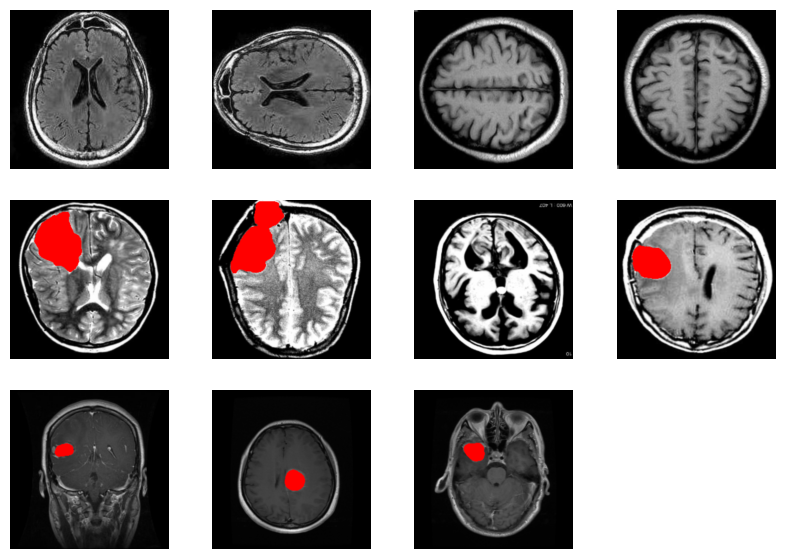

In [ ]:
# Step: Imports and package setup
import cv2 as cv
import numpy as np
import os
from math import ceil
import matplotlib.pyplot as plt

def threshold(array):
    array = array.flatten()
    flat_array = list(map(lambda x: 255 if x > 0.5 else 0, array))
    flat_array = np.array(flat_array)
    th = flat_array.reshape(256, 256)
    return th

def combine_pred_original(path, dir_path=False, plot=False):
    if dir_path == False:
        try:
            image = cv.imread(path)
            if image is None:
                print(f"Error: Could not read image file '{path}'")
                return None

            image = cv.resize(image, (256, 256))
            image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
            image_1 = image_gray / 255.0
            image_1 = image_1.astype(np.float32)
            image_1 = image_1.reshape(-1, 256, 256, 1)
            y_hat = Unet_Model.predict(image_1)
            y_hat = y_hat.reshape(256, 256)
            mask = threshold(y_hat)
            finall_img = np.copy(image)
            index_mask = np.where(mask == 255)
            finall_img[index_mask] = [0, 0, 255]
            finall_img = cv.resize(finall_img, (512, 512))

            if plot == True:
                plt.imshow(finall_img[:, :, ::-1])

            return finall_img
        except Exception as e:
            print(f"Error: {e}")
            return None

    else:
        all_result = {}
        all_img_name = os.listdir(path)
        image_count = len(all_img_name)

        if plot == True:
            rows, columns = 3, ceil(image_count / 3)
            fig = plt.figure(figsize=(10, 7))

        for c, name in enumerate(all_img_name):
            try:
                image = cv.imread(path + '/' + name)
                if image is None:
                    print(f"Error: Could not read image file '{path}/{name}'")
                    continue

                image = cv.resize(image, (256, 256))
                image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
                image_1 = image_gray / 255.0
                image_1 = image_1.astype(np.float32)
                image_1 = image_1.reshape(-1, 256, 256, 1)
                y_hat = Unet_Model.predict(image_1)
                y_hat = y_hat.reshape(256, 256)
                mask = threshold(y_hat)
                finall_img = np.copy(image)
                index_mask = np.where(mask == 255)
                finall_img[index_mask] = [0, 0, 255]
                finall_img = cv.resize(finall_img, (512, 512))
                all_result.update({name: finall_img})

                if plot == True:
                    fig.add_subplot(rows, columns, c + 1)
                    plt.imshow(finall_img[:, :, ::-1])
                    plt.axis('off')
            except Exception as e:
                print(f"Error: {e}")

        return all_result

# Exemple d'utilisation
a = combine_pred_original(path='/content/drive/MyDrive/plot test', dir_path=True, plot=True)